In [98]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.family']=['SimHei','Times New Roman']
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.filterwarnings(action='ignore')

## sigmoid函数

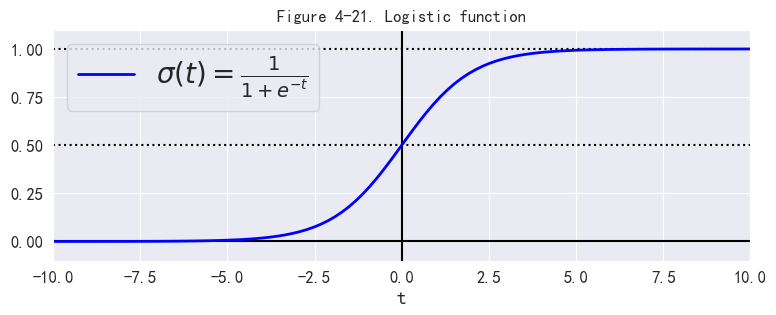

In [99]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Figure 4-21. Logistic function')
plt.show()

## 推导公式
- sigmoid函数
    - $h_\theta(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}$
- 类别定义
    - $\hat{y} = 
\begin{cases}
0 & \text{if } \hat{p} < 0.5, \\
1 & \text{if } \hat{p} \geq 0.5.
\end{cases}$
    - $P(y \mid x; \theta) = (h_\theta(x))^y (1 - h_\theta(x))^{1 - y}$
    - $c(\theta) = 
\begin{cases}
-\log(\hat{p}) & \text{if } y = 1, \\
-\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}$

- 损失函数（交叉熵）
    - 似然函数$L(\theta) = \prod_{i = 1}^{m} P(y_i \mid x_i; \theta) = \prod_{i = 1}^{m} (h_\theta(x_i))^{y_i} (1 - h_\theta(x_i))^{1 - y_i}$ 
    - 对数似然函数$l(\theta) = \log L(\theta) = \sum_{i = 1}^{m} \left( y_i \log h_\theta(x_i) + (1 - y_i) \log (1 - h_\theta(x_i)) \right)$
    - $J(\theta) = -\frac{1}{m} \sum_{i = 1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]$
- 梯度计算
    - $\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i = 1}^{m} \left( g(\theta^T \cdot \mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}$    
- 参数更新
    - $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i = 1}^{m} \left( h_\theta(x_i) - y_i \right) x_i^j$ 

## 鸢尾花数据集

In [100]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [101]:
X=iris["data"][:, 3:]
y=(iris["target"] == 2).astype(np.int64) # if target=2, else 0 前面是一个if判断

In [102]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X, y)

LogisticRegression()

In [103]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba=log_res.predict_proba(X_new)

Text(0.9606606606606607, 1.9, 'decision boundary')

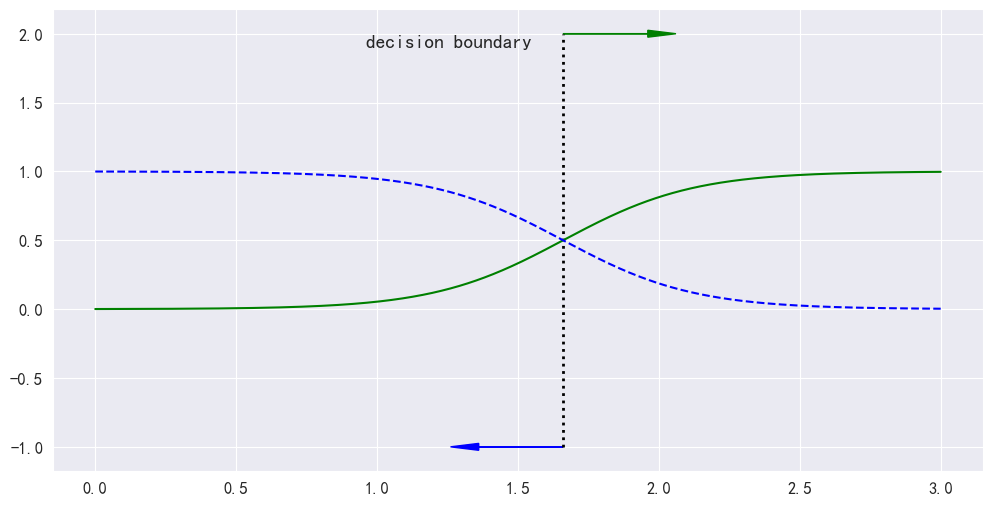

In [104]:
plt.figure(figsize=(12, 6))
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:",linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.arrow(decision_boundary[0],-1,-0.3,0,head_width=0.05,head_length=0.1,color='b')
plt.arrow(decision_boundary[0],2,0.3,0,head_width=0.05,head_length=0.1,color='g')
plt.text(decision_boundary[0]-0.7,1.9,'decision boundary',fontsize=14)

## 决策边界 

In [105]:
X=iris["data"][:, (2, 3)]
y=(iris["target"] == 2).astype(np.int64)
X[:,0].min (), X[:,0].max(),X[:,1].min(), X[:,1].max()

(np.float64(1.0), np.float64(6.9), np.float64(0.1), np.float64(2.5))

In [106]:
log_res = LogisticRegression()
log_res.fit(X, y)

LogisticRegression()

In [107]:
x0, x1 = np.meshgrid(np.linspace(0.5,7,500), np.linspace(0.05,2.7,500))
# x0.ravel(), x1.ravel() #将多维数组展平为一维数组的函数
X_new=np.c_[x0.ravel(), x1.ravel()]

<a list of 6 text.Text objects>

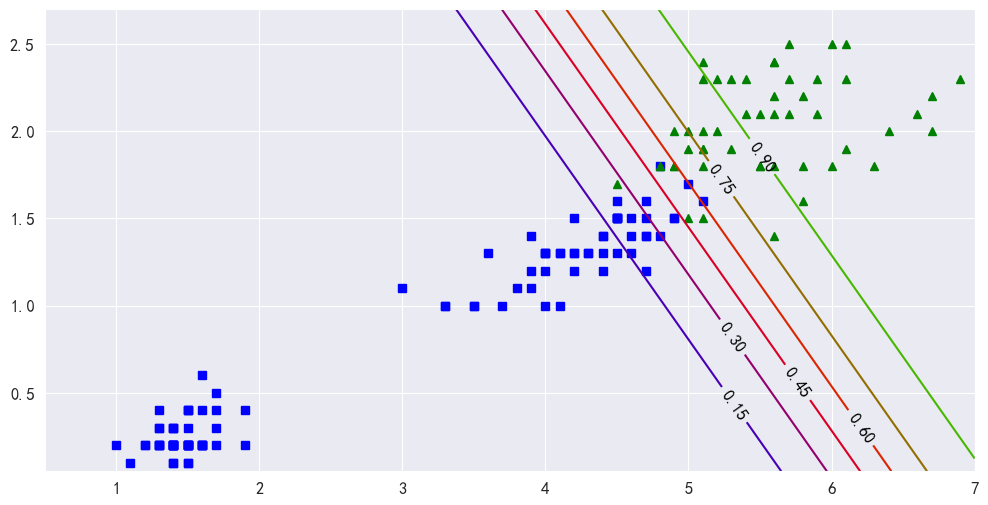

In [108]:
y_proba=log_res.predict_proba(X_new)
plt.figure(figsize=(12, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz=y_proba[:, 1].reshape(x0.shape)
contours=plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contours,inline=1, fontsize=12, colors='black')

## 多分类问题
- softmax计算概率：归一化 (最后的概率或者得分先放大，后归一)
    - $\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j = 1}^{K} \exp(s_j(\mathbf{x}))}$
- 损失函数（交叉熵）：主要看正确类的概率，正确率越接近1损失越小，越接近0损失越大
    - $J(\Theta) = -\frac{1}{m} \sum_{i = 1}^{m} \sum_{k = 1}^{K} y_k^{(i)} \log \left( \hat{p}_k^{(i)} \right)$ 

In [109]:
X=iris["data"][:, (2, 3)]
y=(iris["target"])

In [110]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) # C=10 避免过拟合, 正则化
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]])

array([2])

In [111]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626370e-07, 5.73689802e-02, 9.42630398e-01]])

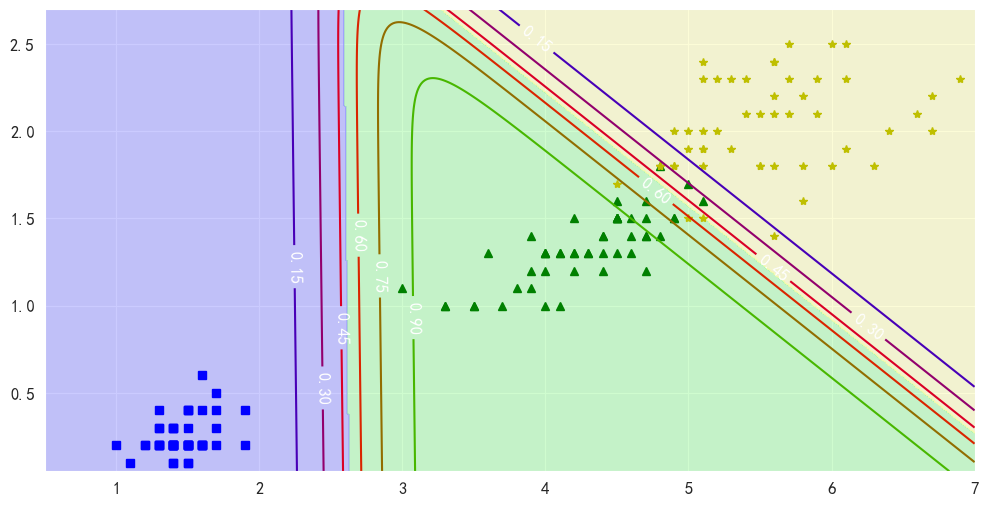

In [120]:
x0, x1 = np.meshgrid(np.linspace(0.5,7,500), np.linspace(0.05,2.7,500))
# x0.ravel(), x1.ravel() #将多维数组展平为一维数组的函数
X_new=np.c_[x0.ravel(), x1.ravel()]
y_proba=softmax_reg.predict_proba(X_new)
y_predict=softmax_reg.predict(X_new)

plt.figure(figsize=(12, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.plot(X[y==2, 0], X[y==2, 1], "y*")
from matplotlib.colors import ListedColormap
cmap=ListedColormap(['#9898ff', '#a0faa0','#fafab0'])

zz=y_proba[:, 1].reshape(x0.shape)
zz2=y_predict.reshape(x0.shape)
plt.contourf(x0, x1, zz2, alpha=0.5, cmap=cmap)
contours=plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contours,inline=1, fontsize=12, colors='w')
plt.show()